In [84]:
#import relevant libraries
import wordcloud
import matplotlib
import bs4
import csv
import pandas
import numpy as np
from collections import Counter
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [85]:
#open connection, grab page
my_url = 'https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_films'
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

In [86]:
#open csv file for writing
file_name = "MarvelBoxOffice.csv"
f = open(file_name,"w")

In [87]:
#write headers to csv
headers = "Film, US Release date, Worldwide Gross, Worldwide Ranking\n"
f.write(headers)

# html parser
page_soup = soup(page_html,"html.parser")

In [88]:
table = page_soup.findAll("table", {"class":"wikitable"}) 
BoxOfficetable = table[4]
BoxOfficetable


<table class="wikitable sortable" style="text-align: center" width="99%">
<tr>
<th rowspan="2" scope="col">Film</th>
<th rowspan="2" scope="col">U.S. release date</th>
<th class="sortable" colspan="3" scope="col">Box office gross</th>
<th class="unsortable" colspan="2" scope="col">All-time Ranking</th>
<th rowspan="2" scope="col">Budget</th>
<th class="unsortable" rowspan="2" scope="col"><span class="nowrap"><abbr title="References">Ref(s)</abbr></span></th>
</tr>
<tr>
<th>U.S. and Canada</th>
<th>Other territories</th>
<th>Worldwide</th>
<th class="sortable"><a class="mw-redirect" href="/wiki/List_of_highest-grossing_films_in_Canada_and_the_United_States#Not_adjusted_for_inflation" title="List of highest-grossing films in Canada and the United States">U.S. and Canada</a></th>
<th class="sortable"><a href="/wiki/List_of_highest-grossing_films" title="List of highest-grossing films">Worldwide</a></th>
</tr>
<tr>
<td scope="row"><i>Iron Man</i></td>
<td>May 2, 2008</td>
<td>$318,412,101<

In [89]:
table_row = BoxOfficetable.findAll("tr") 
table_row[2]

<tr>
<td scope="row"><i>Iron Man</i></td>
<td>May 2, 2008</td>
<td>$318,412,101</td>
<td>$266,762,121</td>
<td>$585,174,222</td>
<td>60</td>
<td>146</td>
<td>$140 million</td>
<td><sup class="reference" id="cite_ref-IMBOM_377-0"><a href="#cite_note-IMBOM-377">[376]</a></sup></td>
</tr>

In [90]:
FilmName = BoxOfficetable.findAll("td", {"scope":"row"}) 
FilmName[0].string

'Iron Man'

In [91]:
row_info = table_row[2].findAll("td")
Film = row_info[0].text
Film

'Iron Man'

In [92]:
row_info = BoxOfficetable.findAll("td")
USReleasedate = row_info[1].text
USReleasedate

'May 2, 2008'

In [93]:
row_info = BoxOfficetable.findAll("td")
WorldwideGross = row_info[4].text
WorldwideGross

'$585,174,222'

In [94]:
row_info = BoxOfficetable.findAll("td")
WorldwideRanking = row_info[6].text
WorldwideRanking

'146'

In [95]:
table_row = BoxOfficetable.findAll("tr") 
for row in table_row[2:len(table_row)-1]:    
    row_info = row.findAll("td")
    Film = row_info[0].text
    USReleasedate = row_info[1].text
    WorldwideGross = row_info[4].text
    WorldwideRanking = row_info[6].text
    f.write(Film.replace(",", "|").replace("\n","") + "," + USReleasedate.replace(",", "|") + "," + WorldwideGross.replace(",", "|") + "," + WorldwideRanking.replace(",", "|").replace("\n","") + "\n")
    
f.close() 

In [51]:
#create arrays to hold data from csv columns
movieNames = []
grossCollection = []

#read data from csv columns to arrays
with open('MarvelBoxOffice.csv') as csvfile:
	readCSV = csv.reader(csvfile, delimiter = ',')
	for row in readCSV:
		movieNames.append(row[0])
		grossCollection.append(row[2].replace("|","").replace("$",""))


In [108]:
moviedata=pandas.read_csv("MarvelBoxOffice.csv")
print(moviedata)

                                    Film    US Release date  Worldwide Gross  \
0                               Iron Man        May 2| 2008     $585|174|222   
1   Incredible Hulk !The Incredible Hulk      June 13| 2008     $263|427|551   
2                             Iron Man 2        May 7| 2010     $623|933|331   
3                                   Thor        May 6| 2011     $449|326|618   
4     Captain America: The First Avenger      July 22| 2011     $370|569|774   
5                  Marvel's The Avengers        May 4| 2012   $1|518|812|988   
6                             Iron Man 3        May 3| 2013   $1|214|811|252   
7                   Thor: The Dark World   November 8| 2013     $644|571|402   
8    Captain America: The Winter Soldier      April 4| 2014     $714|264|267   
9                Guardians of the Galaxy     August 1| 2014     $773|328|629   
10               Avengers: Age of Ultron        May 1| 2015   $1|405|403|694   
11                               Ant-Man

In [104]:
moviedata=pandas.read_csv("MarvelBoxOffice.csv")
moviedata.head()

moviedata.describe()

,Film,US Release date,Worldwide Gross,Worldwide Ranking
0,Iron Man,May 2| 2008,$585|174|222,146
1,Incredible Hulk !The Incredible Hulk,June 13| 2008,$263|427|551,508
2,Iron Man 2,May 7| 2010,$623|933|331,128
3,Thor,May 6| 2011,$449|326|618,222
4,Captain America: The First Avenger,July 22| 2011,$370|569|774,298


In [97]:
moviedata[' Worldwide Gross'].describe()

count               18
unique              18
top       $519|311|965
freq                 1
Name:  Worldwide Gross, dtype: object

In [98]:
moviedata.dtypes

Film                  object
 US Release date      object
 Worldwide Gross      object
 Worldwide Ranking     int64
dtype: object

In [99]:
moviedata_group = moviedata.groupby('Film')
moviedata_group.size()

Film
Ant-Man                                 1
Avengers: Age of Ultron                 1
Black Panther                           1
Captain America: Civil War              1
Captain America: The First Avenger      1
Captain America: The Winter Soldier     1
Doctor Strange                          1
Guardians of the Galaxy                 1
Guardians of the Galaxy Vol. 2          1
Incredible Hulk !The Incredible Hulk    1
Iron Man                                1
Iron Man 2                              1
Iron Man 3                              1
Marvel's The Avengers                   1
Spider-Man: Homecoming                  1
Thor                                    1
Thor: Ragnarok                          1
Thor: The Dark World                    1
dtype: int64

In [100]:
moviedata_totals = moviedata_group.sum()
moviedata_totals

,Worldwide Ranking
Film,
Ant-Man,179
Avengers: Age of Ultron,7
Black Panther,10
Captain America: Civil War,16
Captain America: The First Avenger,298
Captain America: The Winter Soldier,96
Doctor Strange,108
Guardians of the Galaxy,81
Guardians of the Galaxy Vol. 2,60


In [ ]:
moviedata_totals = moviedata_group.sum()
moviedata_totals

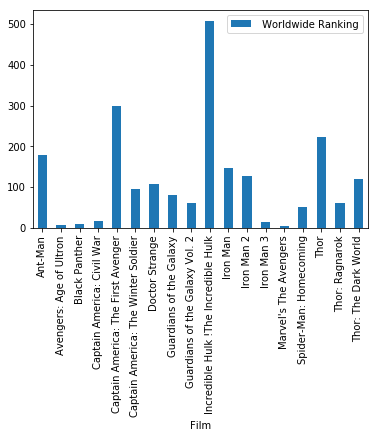

In [101]:
my_plot = moviedata_totals.plot(kind='bar')
my_plot.figure

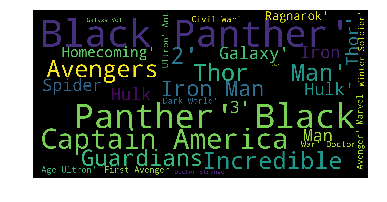

In [107]:
#Create Word cloud
wc = WordCloud(scale = 4)
wc.generate(str(movieNames))
plt.imshow(wc)
plt.axis('off')
plt.show()